In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
os.chdir("D:/TruckDriver/darkflow/mlp-training_fullimage")
path = "D:/TruckDriver/darkflow/mlp-training_fullimage/"


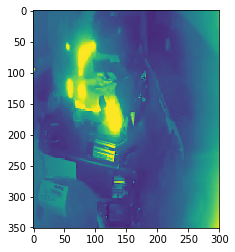

In [2]:
img = cv2.imread("abnormal_img_0.jpg",0)
plt.imshow(img)

In [3]:
img2 = cv2.resize(img, (300,300))
#plt.imshow(img2)
img2 = img2.flatten()

In [16]:
from sklearn.utils import shuffle 

def simpson_train_batch_generator(x, y, bs, shape):
    x_train = np.array([]).reshape((0, shape))
    y_train = np.array([]).reshape((0, y.shape[1]))
    while True:
        new_ind = shuffle(range(len(x)))
        x = x.take(new_ind)
        y = np.take(y, new_ind, axis=0)
        for i in range(len(x)):
            dir_img =  x.img.iloc[i]
            name = x.take([i])['img']
            img = cv2.imread(dir_img,0)
            img = cv2.resize(img, (300,300))
            x_train = np.row_stack([x_train, img.flatten()])
            y_train = np.row_stack([y_train, y[i]])
            if x_train.shape[0] == bs:
                x_batch = x_train.copy()
                x_batch /= 255.
                y_batch = y_train.copy()
                x_train = np.array([]).reshape((0 ,shape))
                y_train = np.array([]).reshape((0 ,y.shape[1]))        
                yield x_batch, y_batch

In [5]:
# file = open("csv/truck_driver.csv" ,'w')
# file.truncate(0)
# file.write("img")
# file.write(",")
# file.write("class")
# file.write("\n")
# for f in os.listdir(path):
#     if '.jpg' in f:
#         if 'cellphone' in f:
#             file.write(f)
#             file.write(",")
#             file.write("cellphone")
#             file.write("\n")
#         else:
#             file.write(f)
#             file.write(",")
#             file.write("others")
#             file.write("\n")
# file.close()


In [5]:
imv_csv = pd.read_csv("csv/truck_driver.csv")
print(imv_csv.head)

<bound method NDFrame.head of                        img  class
0       abnormal_img_0.jpg      0
1       abnormal_img_1.jpg      0
2      abnormal_img_10.jpg      0
3     abnormal_img_100.jpg      0
4     abnormal_img_101.jpg      0
5     abnormal_img_102.jpg      0
6     abnormal_img_103.jpg      0
7     abnormal_img_104.jpg      0
8     abnormal_img_105.jpg      0
9     abnormal_img_106.jpg      0
10    abnormal_img_107.jpg      0
11    abnormal_img_108.jpg      0
12    abnormal_img_109.jpg      0
13     abnormal_img_11.jpg      0
14    abnormal_img_110.jpg      0
15    abnormal_img_111.jpg      0
16    abnormal_img_112.jpg      0
17    abnormal_img_113.jpg      0
18    abnormal_img_114.jpg      0
19    abnormal_img_115.jpg      0
20    abnormal_img_116.jpg      0
21    abnormal_img_117.jpg      0
22    abnormal_img_118.jpg      0
23    abnormal_img_119.jpg      0
24     abnormal_img_12.jpg      0
25    abnormal_img_120.jpg      0
26    abnormal_img_121.jpg      0
27    abnormal_img

In [6]:
class_y = pd.get_dummies(imv_csv['class'], '').as_matrix()#將label做 one_hot encoding
print(class_y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


C:\Users\Yuga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
#x_train_list, y_train = imv_csv, class_y #資料切割
#print(x_train_list)
x_train_list, x_test, y_train, y_test = train_test_split(imv_csv,class_y,test_size=0.25, random_state=42)
print(x_train_list)

                       img  class
2543   normal_img_2698.jpg      1
297   abnormal_img_366.jpg      0
303   abnormal_img_371.jpg      0
2651   normal_img_2795.jpg      1
4291   normal_img_4270.jpg      1
3544   normal_img_3599.jpg      1
7416    normal_img_964.jpg      1
3800   normal_img_3829.jpg      1
6599   normal_img_6348.jpg      1
655       normal_img_0.jpg      1
6828   normal_img_6554.jpg      1
4963   normal_img_4876.jpg      1
5058   normal_img_4961.jpg      1
1940   normal_img_2154.jpg      1
4660   normal_img_4602.jpg      1
240   abnormal_img_314.jpg      0
783    normal_img_1112.jpg      1
1354   normal_img_1627.jpg      1
1018   normal_img_1324.jpg      1
2663   normal_img_2805.jpg      1
977    normal_img_1288.jpg      1
809    normal_img_1136.jpg      1
6240   normal_img_6024.jpg      1
2138   normal_img_2332.jpg      1
257    abnormal_img_33.jpg      0
1599   normal_img_1848.jpg      1
893    normal_img_1211.jpg      1
3250   normal_img_3333.jpg      1
1744   normal_

In [8]:
tf.reset_default_graph()

In [9]:
#### define placeholder ####
input_data = tf.placeholder(dtype=tf.float32, 
                           shape=[None, img2.shape[0]],
                           name='input_data') #用來接 feature 資料進入 tensorflow 

y_true = tf.placeholder(dtype=tf.float32, 
                        shape=[None, y_train.shape[1]],
                        name='y_true') #用來接 label 資料進入 tensorflow 

In [10]:
#### define variables(weight/bias) ####
x1 = tf.layers.dense(input_data, 256, activation=tf.nn.sigmoid, name='hidden1') #第一層hidden layer
x2 = tf.layers.dense(x1, 128, activation=tf.nn.sigmoid, name='hidden2') #第二層hidden layer
x3 = tf.layers.dense(x2, 64, activation=tf.nn.sigmoid, name='hidden3')#第三層hidden layer
out = tf.layers.dense(x3, y_train.shape[1], name='output')# output layer

y_pred = out

In [11]:
#### calculate loss ####
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
#### optimize variables ####
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
update = opt.minimize(loss)

In [13]:
#### init ####
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
tf.global_variables() ## 檢查 graph 裏的 global variables

[<tf.Variable 'hidden1/kernel:0' shape=(90000, 256) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'hidden2/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'hidden2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'hidden3/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'hidden3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'output/kernel:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'output/bias:0' shape=(2,) dtype=float32_ref>]

In [17]:
from tqdm import tqdm_notebook #用來顯示進度條的套件
from sklearn.metrics import accuracy_score


#epoch = 50 #要跑多少epoch
epoch = 0
bs = 32 #設定看過幾筆資料走一次更新(batch size)
update_per_epoch = 100 #一個epoch要跑幾個batch
'''因為我們現在是用generator產生新的batch，所以我們要自行給定一個epoch要跑幾個batch,
當然也可以另外修改程式讓generator回傳適合的batch數(total number of data/batch size)'''

tr_loss = list() #準備一個空的list用來存training過程中的loss值
tr_acc = list() #準備一個空的list用來存training過程中的準確率
train_gen = simpson_train_batch_generator(x_train_list, y_train, bs, img2.shape[0])

print('start modelling!')

#for i in range(epoch):
while True:    
    #### calculate training loss & update variables ####
    training_loss = 0 #用來計算epoch內所有batch loss的平均值，所以在每個epoch一開始要歸零
    training_acc = 0#用來計算epoch內所有batch acc的平均值，所以在每個epoch一開始要歸零
    bar = tqdm_notebook(range(update_per_epoch)) #外面的tqdm是進度條的function
    batch_num = 0
    epoch += 1
    for j in bar:
        
        
        x_batch, y_batch = next(train_gen) #我們是用yield來寫generator,所以用next取得下一筆資料
        
        tr_pred, training_loss_batch, _ = sess.run([y_pred, loss, update], feed_dict={
            input_data:x_batch,
            y_true:y_batch
        })
        
        training_loss += training_loss_batch
        
        #training_acc_batch = accuracy_score(np.argmax(y_batch, axis=1), np.argmax(tr_pred, axis=1))
        training_acc_batch = f1_score(np.argmax(y_batch, axis=1), np.argmax(tr_pred, axis=1), average='binary')
        if sum(np.argmax(tr_pred, axis=1)) == bs:
            batch_num += 1
        
        training_acc += training_acc_batch
        
        if j % 5 == 0:
            bar.set_description('loss: %.4g' % training_loss_batch) 
            #每5次batch更新顯示的batch loss(進度條前面)

    training_loss /= update_per_epoch
    training_acc /= update_per_epoch
    
    tr_loss.append(training_loss)
    tr_acc.append(training_acc)
    print(str(batch_num))
    print('epoch {epochs}: training loss {training_loss}'.format(
            epochs=epoch, 
            training_loss=training_loss))#每個epoch結束後顯示目前的的training loss
    if epoch%200==0:
        saver = tf.train.Saver()
        #先指定主路徑
        maindir="D:/TruckDriver/darkflow/mlp-training/"
        if not os.path.isdir(maindir):
            os.makedirs(maindir)
            os.chdir(maindir)
        else:
            os.chdir(maindir)
        #再指定存檔相對路徑存檔
        saver.save(sess, "saved_models/model-fullimage"+"-"+str(epoch)+".ckpt")
    if epoch == 2000:
        break
    


start modelling!


C:\Users\Yuga\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


85
epoch 1: training loss 0.5150820752978325


100
epoch 2: training loss 0.3185424454510212


100
epoch 3: training loss 0.29723412796854976


100
epoch 4: training loss 0.28293511405587196


100
epoch 5: training loss 0.29590830601751805


100
epoch 6: training loss 0.2711355996876955


100
epoch 7: training loss 0.2824162642657757


100
epoch 8: training loss 0.2837703500688076


KeyboardInterrupt: 

Text(0.5,1,'Accuracy')

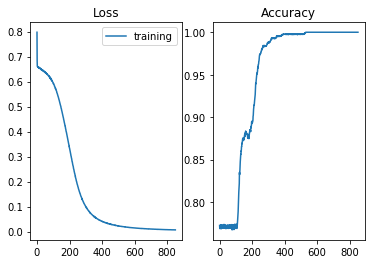

In [19]:
plt.figure(1)
plt.subplot(121)
plt.plot(range(len(tr_loss)), tr_loss, label='training')
plt.title('Loss')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(range(len(tr_acc)), tr_acc, label='training')
plt.title('Accuracy')

In [18]:
saver = tf.train.Saver()
#先指定主路徑
maindir="D:/TruckDriver/darkflow/mlp-training/"
if not os.path.isdir(maindir):
    os.makedirs(maindir)
    os.chdir(maindir)
else:
    os.chdir(maindir)
#再指定存檔相對路徑存檔
saver.save(sess, "saved_models/model.ckpt")

'saved_models/model.ckpt'

# Test data

In [24]:
'''rerun the graph first:
先回到上面將一開始和graph有關的cell先重新執行一遍，將graph架構先建立起來(這樣讀進來的參數才有對應位置存放)'''

path = "D:/TruckDriver/darkflow/mlp-training/"
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, path+"saved_models/model-800.ckpt") #到我們剛剛存檔的路徑將檔案叫出來，放入graph中對應的參數位置

INFO:tensorflow:Restoring parameters from D:/TruckDriver/darkflow/mlp-training/saved_models/model-800.ckpt


In [25]:
tf.global_variables()

[<tf.Variable 'hidden1/kernel:0' shape=(10000, 256) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'hidden2/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'hidden2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'hidden3/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'hidden3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'output/kernel:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'output/bias:0' shape=(2,) dtype=float32_ref>]

In [26]:

# count = 0
# for f in os.listdir(path):
#     if 'jpg' in f:
#         img5 = cv2.imread(path+f,0)
#         img5 = cv2.resize(img5, (100,100))
#         img5 = img5.flatten()
#         test1 = np.array([]).reshape((0 ,img5.shape[0]))
#         test1 = np.row_stack([test1, img5.flatten()])
#         #test1 = img4
#         test1 /= 255.
#         #test1
#         #testy1 = np.array([]).reshape((0 ,y_train.shape[1]))
#         #testy1 = np.row_stack([testy1, class_y[0]])
#         tr_pred = sess.run([y_pred], feed_dict={input_data:test1,})
#         #print(f)
#         #print(str(count)+" : "+str(tr_pred))
#         print(f+" : "+str(tr_pred))
#         count+=1

In [27]:
predict = []
for i in range(len(x_test)):
    img = cv2.imread(x_test.img.iloc[i],0)
    img = cv2.resize(img,(100,100))
    img = img.flatten()
    x = np.array([]).reshape((0,img.shape[0]))
    x = np.row_stack([x, img])
    x /= 255
    tr_pred = sess.run([y_pred], feed_dict={input_data:x})
    print(x_test.img.iloc[i], tr_pred[0][0], y_test[i])
    #print(x_test.img.iloc[i], tr_pred, y_test[i])
    predict.append(np.argmax(tr_pred[0][0], axis=0))
acc = f1_score(np.argmax(y_test, axis=1),predict,average='binary')
#print(predict)
#print('-------------')
#print(np.argmax(y_test, axis=1))
print('f1-score:', acc)

paper-20180626_10_10.jpg [-1.4722905   0.81789076] [0 1]
cellphone-133.jpg [ 4.623906 -4.614324] [1 0]
paper-20180625_1_7.jpg [-4.845351   3.8122292] [0 1]
cup-20180628_0_2.jpg [-4.204884   3.2457898] [0 1]
cellphone-80.jpg [ 4.2766986 -4.3123565] [1 0]
cup-20180627_19_46.jpg [-3.395431   2.5198302] [0 1]
cellphone-96.jpg [ 3.3933024 -3.5230143] [1 0]
cellphone-31.jpg [ 3.8414583 -3.9219112] [1 0]
paper-20180626_2_48.jpg [-2.850533  2.048392] [0 1]
cellphone-125.jpg [ 4.701471  -4.6838584] [1 0]
cellphone-163.jpg [ 4.170058  -4.2173853] [1 0]
cellphone-92.jpg [ 3.1225512 -3.288376 ] [1 0]
cellphone-67.jpg [ 3.4985456 -3.618363 ] [1 0]
paper-20180625_5_78.jpg [-4.172176   3.2189152] [0 1]
paper-20180626_12_17.jpg [-3.3136265  2.455203 ] [0 1]
cellphone-148.jpg [ 2.3825212 -2.6225355] [1 0]
cup-20180628_5_78.jpg [-6.2270684  5.0260396] [0 1]
cup-20180628_2_51.jpg [-4.270013   3.3035448] [0 1]
paper-20180630_10_9.jpg [-3.6877532  2.787015 ] [0 1]
cellphone-172.jpg [ 3.8917987 -3.9647903] 

In [33]:
path = "D:/TruckDriver/darkflow/mlp-training/"
count = 0
for f in os.listdir(path):
    if 'jpg' in f:
        img5 = cv2.imread(path+f,0)
        img5 = cv2.resize(img5, (100,100))
        img5 = img5.flatten()
        test1 = np.array([]).reshape((0 ,img5.shape[0]))
        test1 = np.row_stack([test1, img5.flatten()])
        #test1 = img4
        test1 /= 255.
        #test1
        #testy1 = np.array([]).reshape((0 ,y_train.shape[1]))
        #testy1 = np.row_stack([testy1, class_y[0]])
        tr_pred = sess.run([y_pred], feed_dict={input_data:test1,})
        print(f)
        print(str(count)+" : "+str(tr_pred))
        count+=1

20180625_0_0.jpg
0 : [array([[-1.239364 ,  1.5875891]], dtype=float32)]
20180625_0_1.jpg
1 : [array([[-1.1156284,  1.4538001]], dtype=float32)]
20180625_0_2.jpg
2 : [array([[-1.2309467,  1.5774527]], dtype=float32)]
20180625_0_3.jpg
3 : [array([[-1.0982678,  1.4380491]], dtype=float32)]
20180625_10_10.jpg
4 : [array([[-1.6372783,  2.0249305]], dtype=float32)]
20180625_10_11.jpg
5 : [array([[-1.3872126,  1.7410325]], dtype=float32)]
20180625_10_8.jpg
6 : [array([[-1.4798462,  1.8443989]], dtype=float32)]
20180625_10_9.jpg
7 : [array([[-1.1318674,  1.4710613]], dtype=float32)]
20180625_11_12.jpg
8 : [array([[-1.2338104,  1.5779198]], dtype=float32)]
20180625_11_13.jpg
9 : [array([[-1.3472869,  1.7012212]], dtype=float32)]
20180625_11_14.jpg
10 : [array([[-0.11688039,  0.4021288 ]], dtype=float32)]
20180625_11_15.jpg
11 : [array([[-1.4613402,  1.8271477]], dtype=float32)]
20180625_12_16.jpg
12 : [array([[-1.2076211,  1.5632044]], dtype=float32)]
20180625_12_17.jpg
13 : [array([[-1.3309538

217 : [array([[-0.7599095,  1.073611 ]], dtype=float32)]
20180628_13_21.jpg
218 : [array([[-1.2595049,  1.6089123]], dtype=float32)]
20180628_13_22.jpg
219 : [array([[-1.257551 ,  1.6089233]], dtype=float32)]
20180628_13_23.jpg
220 : [array([[-1.2915468,  1.6408548]], dtype=float32)]
20180628_14_24.jpg
221 : [array([[-1.3260206,  1.6753997]], dtype=float32)]
20180628_14_25.jpg
222 : [array([[-1.1342663,  1.4670119]], dtype=float32)]
20180628_14_26.jpg
223 : [array([[-1.131784 ,  1.4780612]], dtype=float32)]
20180628_14_27.jpg
224 : [array([[-0.74288523,  1.0420551 ]], dtype=float32)]
20180628_15_28.jpg
225 : [array([[-0.97433794,  1.3065729 ]], dtype=float32)]
20180628_15_29.jpg
226 : [array([[-1.2591848,  1.605193 ]], dtype=float32)]
20180628_15_30.jpg
227 : [array([[-0.9452312,  1.2687935]], dtype=float32)]
20180628_15_31.jpg
228 : [array([[-0.8483841,  1.1589681]], dtype=float32)]
20180628_16_32.jpg
229 : [array([[-1.0081447,  1.336622 ]], dtype=float32)]
20180628_16_33.jpg
230 : [a

433 : [array([[-0.7259011,  1.0401636]], dtype=float32)]
cellphone-12.jpg
434 : [array([[ 0.395679  , -0.14072216]], dtype=float32)]
cellphone-120.jpg
435 : [array([[ 0.42773893, -0.1881621 ]], dtype=float32)]
cellphone-121.jpg
436 : [array([[-0.8651055,  1.1889058]], dtype=float32)]
cellphone-122.jpg
437 : [array([[-0.10500652,  0.3748406 ]], dtype=float32)]
cellphone-123.jpg
438 : [array([[0.24033137, 0.0141126 ]], dtype=float32)]
cellphone-124.jpg
439 : [array([[ 0.4073762 , -0.16032733]], dtype=float32)]
cellphone-125.jpg
440 : [array([[ 0.51065344, -0.2713757 ]], dtype=float32)]
cellphone-126.jpg
441 : [array([[ 0.43297216, -0.19200082]], dtype=float32)]
cellphone-127.jpg
442 : [array([[ 0.4556128 , -0.21016733]], dtype=float32)]
cellphone-128.jpg
443 : [array([[ 0.56200755, -0.3275432 ]], dtype=float32)]
cellphone-129.jpg
444 : [array([[ 0.32215077, -0.07021409]], dtype=float32)]
cellphone-13.jpg
445 : [array([[-0.6429329,  0.9448004]], dtype=float32)]
cellphone-130.jpg
446 : [ar

645 : [array([[-1.3041916,  1.6565531]], dtype=float32)]
cup-20180628_14_24.jpg
646 : [array([[-1.4370708,  1.8013006]], dtype=float32)]
cup-20180628_14_25.jpg
647 : [array([[-1.4028288,  1.7641765]], dtype=float32)]
cup-20180628_14_26.jpg
648 : [array([[-1.1156243,  1.4521463]], dtype=float32)]
cup-20180628_14_27.jpg
649 : [array([[-1.4661521,  1.8327897]], dtype=float32)]
cup-20180628_15_28.jpg
650 : [array([[-1.3895795,  1.7488565]], dtype=float32)]
cup-20180628_15_29.jpg
651 : [array([[-1.2834609,  1.6350952]], dtype=float32)]
cup-20180628_15_30.jpg
652 : [array([[-1.3464713,  1.7041411]], dtype=float32)]
cup-20180628_15_31.jpg
653 : [array([[-1.4158117,  1.7788905]], dtype=float32)]
cup-20180628_16_32.jpg
654 : [array([[-1.4207555,  1.7830113]], dtype=float32)]
cup-20180628_16_33.jpg
655 : [array([[-0.5171465,  0.8351196]], dtype=float32)]
cup-20180628_16_34.jpg
656 : [array([[-1.2404628,  1.5871758]], dtype=float32)]
cup-20180628_16_35.jpg
657 : [array([[-1.4476185,  1.8126515]],

845 : [array([[-0.16308224,  0.45230436]], dtype=float32)]
paper-20180629_24_68.jpg
846 : [array([[-0.13753253,  0.42823103]], dtype=float32)]
paper-20180630_0_0.jpg
847 : [array([[-0.965272 ,  1.2915962]], dtype=float32)]
paper-20180630_0_1.jpg
848 : [array([[-1.0306765,  1.3731645]], dtype=float32)]
paper-20180630_0_2.jpg
849 : [array([[-0.88288796,  1.2125    ]], dtype=float32)]
paper-20180630_0_3.jpg
850 : [array([[-0.9056346,  1.2316298]], dtype=float32)]
paper-20180630_10_10.jpg
851 : [array([[-1.089932 ,  1.4302689]], dtype=float32)]
paper-20180630_10_11.jpg
852 : [array([[-1.0220884,  1.3599321]], dtype=float32)]
paper-20180630_10_8.jpg
853 : [array([[-1.0731422,  1.4143358]], dtype=float32)]
paper-20180630_10_9.jpg
854 : [array([[-1.1015687,  1.4455788]], dtype=float32)]
paper-20180630_11_12.jpg
855 : [array([[-1.0448935,  1.384747 ]], dtype=float32)]
paper-20180630_12_16.jpg
856 : [array([[-1.0093195,  1.3425325]], dtype=float32)]
paper-20180630_12_17.jpg
857 : [array([[-1.02

In [23]:
saver = tf.train.Saver()
#先指定主路徑
maindir="D:/TruckDriver/darkflow/mlp-training/"
if not os.path.isdir(maindir):
    os.makedirs(maindir)
    os.chdir(maindir)
else:
    os.chdir(maindir)
#再指定存檔相對路徑存檔
saver.save(sess, "saved_models/model.ckpt")

'saved_models/model.ckpt'